AMATH 584 Homework 3  
Kelton Busby

# Problem 1

In [415]:
import numpy as np
import os
import scipy.linalg as spl
from matplotlib import pyplot as plt
import pandas as pd

## Download datasets:

In [416]:
# Iterate through the original images folder finding all files
filelist=[]
for root, dirs, files in os.walk('C://Users//Kelton//UW//AMATH584//Homework//hw2/yalefaces/'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

# Build a list of images from the files
images=[]
for imgfile in filelist:
    images.append(plt.imread(imgfile))

number of images: 165


In [417]:
# Iterate through the cropped images folder finding all files
filelist=[]
for root, dirs, files in os.walk('C:\\Users\\Kelton\\UW\\AMATH584\\Homework\\hw2\\yalefaces_cropped'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

# Build a list of images from the files
cropped_images=[]
for imgfile in filelist:
    cropped_images.append(plt.imread(imgfile))

number of images: 272


## Modified Gram-Schmidt Orthogonalization Procedure

In [418]:
len(A[:,19])

25

In [419]:
def modGramSchmidt(A):
    
    m,n = np.shape(A)
    Q = np.zeros([m,m])
    R = np.zeros([m,n])
    V = A.copy()
    
    
    '''Returns an orthogonalization of input matrix A using modified Gram-Schmidt algorithm.'''
    
    for i in np.arange(0,n):
        
        R[i,i] = np.linalg.norm(V[:,i], ord=2)
        Q[:,i]=V[:,i] / R[i,i]
        
        for j in np.arange(i+1,n):
            R[i,j] = np.dot(np.conjugate(np.transpose(Q))[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]            
        
    return Q,R
    

Creating a well conditioned matrix:

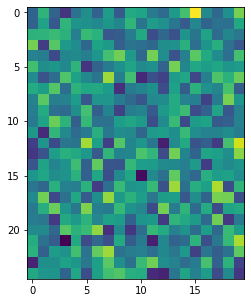

In [420]:
A = np.random.randn(25,20)
A.tofile('A.csv',sep=',')

plt.figure(figsize=[5,5])
plt.imshow(A)

Checking the condition number:

In [421]:
np.round(np.linalg.cond(A),2)

6.9

Comparing the modified Gram Schmidt to scipy implementation of QR orthogonalization: 

In [422]:
q,r = modGramSchmidt(A)

# comparing with scipy QR
Q, R = spl.qr(A, mode='full')

Capital Q,R is scipy implementation.  
Lower q,r is my implementation. 

In [423]:
Q[0]

array([-0.19754025, -0.15682313,  0.10862918, -0.40118918, -0.19433725,
       -0.06404279, -0.00448065, -0.11352565, -0.40686957,  0.1218083 ,
       -0.01269892,  0.00177878, -0.14622569,  0.04615999,  0.22914519,
        0.47523196,  0.25890418,  0.16135011,  0.04170865,  0.24683168,
        0.12821622, -0.06955237,  0.20325656,  0.08527249,  0.02919338])

In [424]:
q[0]

array([-0.19754025,  0.17972082, -0.18410463, -0.39650835, -0.26952565,
        0.0070727 , -0.2383247 ,  0.0510136 , -0.27965249,  0.15371213,
        0.10497967, -0.09658893, -0.15655115,  0.06385764,  0.37949794,
        0.55652853, -0.03867505, -0.26381976,  0.23774386,  0.1628757 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [425]:
np.diag(R)

array([ 4.81643767, -4.67658399, -4.92236671,  4.3630971 ,  3.06065611,
        4.02477436,  3.95644798, -5.27743836,  4.20180394,  3.05980023,
        3.84227545,  4.42209597,  4.41662782,  2.69714043,  3.07063883,
        2.9488622 ,  2.56747648, -2.87805563,  3.60938934,  3.33193532])

In [426]:
np.diag(r)

array([4.81643767, 4.71167986, 5.21334248, 4.82234078, 3.22191528,
       5.13396504, 4.59194387, 5.98836487, 4.90003751, 3.51502705,
       4.80689751, 5.97350454, 5.57995415, 5.02149649, 4.45625218,
       6.87663096, 4.36727769, 5.35224375, 5.09795689, 5.89297008])

Bringing in the matlab:

Capital Q,Rmat is matlab implementation.  
Lower q,rmat is qrfactor implementation. 

In [404]:
## MATLAB Code Run in MATLAB ##

# A=importdata('C:\Users\Kelton\UW\AMATH584\Homework\hw3\A.csv');
# A=reshape(A,[25,20]);
# [q,r] = qrfactor(A);
# [Q,R] = qr(A);
# writematrix(q, 'qfactor.txt');
# writematrix(r, 'rfactor.txt');
# writematrix(Q, 'Qmat.txt');
# writematrix(R, 'Rmat.txt');

## MATLAB Code Run in MATLAB ##

In [427]:
Qmat = np.array(pd.read_csv('Qmat.txt', header=None))
Rmat = np.array(pd.read_csv('Rmat.txt', header=None))
qmat = np.array(pd.read_csv('qfactor.txt', header=None))
rmat = np.array(pd.read_csv('rfactor.txt', header=None))

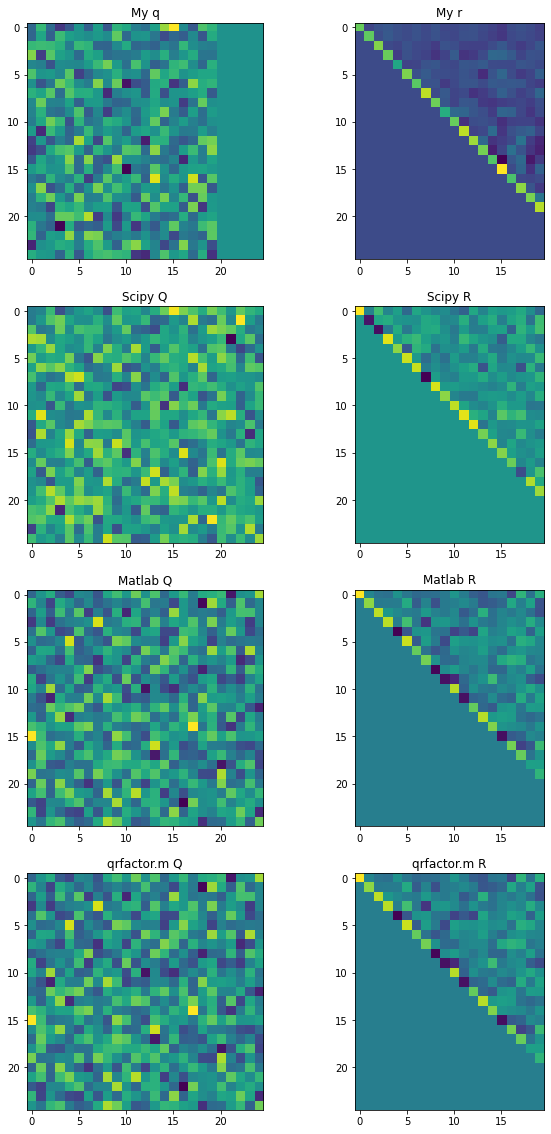

In [428]:
plt.figure(figsize=[10,20])
plt.subplot(4,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(4,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(4,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(4,2,4)
plt.title('Scipy R')
plt.imshow(R)
plt.subplot(4,2,5)
plt.title('Matlab Q')
plt.imshow(Qmat)
plt.subplot(4,2,6)
plt.title('Matlab R')
plt.imshow(Rmat)
plt.subplot(4,2,7)
plt.title('qrfactor.m Q')
plt.imshow(qmat)
plt.subplot(4,2,8)
plt.title('qrfactor.m R')
plt.imshow(rmat)

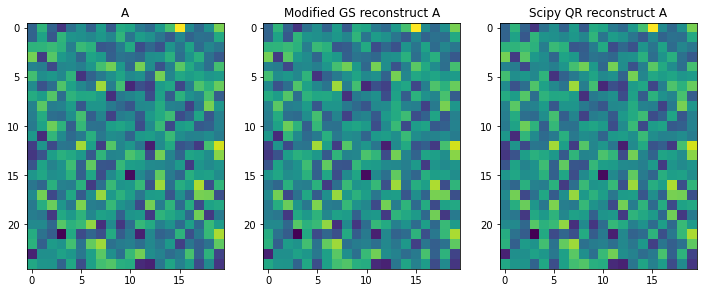

In [445]:
plt.figure(figsize=[12,5])
plt.subplot(1,3,1)
plt.title('A')
plt.imshow(A)
plt.subplot(1,3,2)
plt.title('Modified GS reconstruct A')
plt.imshow(q.dot(r))
plt.subplot(1,3,3)
plt.title('Scipy QR reconstruct A')
plt.imshow(Q.dot(R))

Scipy implementation of QR and Modified Gram-Schmidt are able to reconstruct A.

Creating a matrix with poor conditioning:

In [519]:
from sklearn.datasets import make_classification
A = make_classification(n_repeated=3, n_samples=25, n_features=20)[0]

In [520]:
np.linalg.cond(A)

7.262175989507056e+16

In [521]:
q,r = modGramSchmidt(A)

In [522]:
Q,R = spl.qr(A)

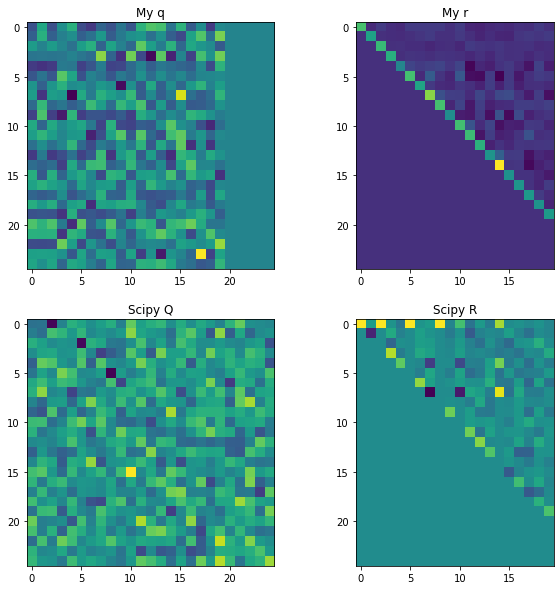

In [523]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(2,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(2,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(2,2,4)
plt.title('Scipy R')
plt.imshow(R)

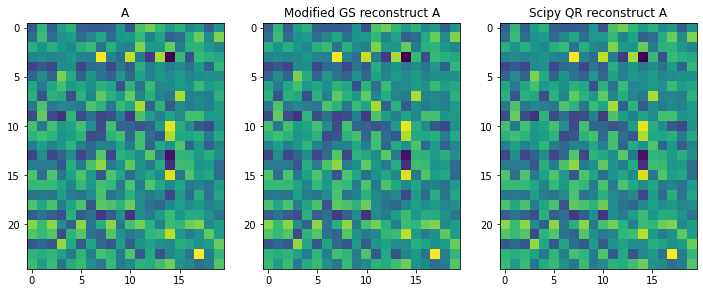

In [524]:
plt.figure(figsize=[12,5])
plt.subplot(1,3,1)
plt.title('A')
plt.imshow(A)
plt.subplot(1,3,2)
plt.title('Modified GS reconstruct A')
plt.imshow(q.dot(r))
plt.subplot(1,3,3)
plt.title('Scipy QR reconstruct A')
plt.imshow(Q.dot(R))

Both Modified GS and Scipy QR reconstruct A.

However, Modified GS (q) is not orthogonal when the matrix condition number is very high, where Scipy (Q) is orthogonal.

Scipy Orthogonality Check:

In [525]:
np.linalg.norm(Q.dot(Q.T) - np.identity(Q.shape[0]))

2.1823302649927887e-15

Modified GS orthogonality check:

In [526]:
np.linalg.norm(q.dot(q.T) - np.identity(q.shape[0]))

6.399994219427859

# Problem 2

In [165]:
def f(x):
    return (x-2)**9

def f2(x):
    return x**9-18*x**8+144*x**7-672*x**6+2016*x**5-4032*x**4+5376*x**3-4608*x**2+2304*x-512

In [223]:
dx=.001
x = np.arange(1.92,2.08+dx,dx)

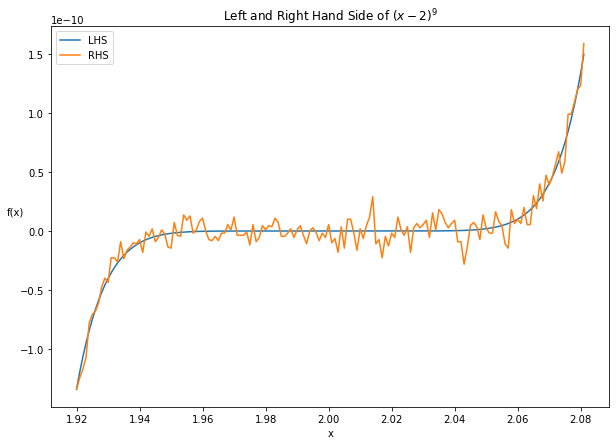

In [238]:
plt.figure(figsize=[10,7])
plt.plot(x,f(x), label='LHS')
plt.plot(x,f2(x), label='RHS')
plt.xlabel('x'); plt.ylabel('f(x)', rotation=0)
plt.title('Left and Right Hand Side of $(x-2)^9$');
plt.legend();

While the two functions are analytically equal, numerical roundoff causes errors in the evaluation of the RHS. The errors are on the order of 1E-10.

# Problem 3

## Part (a)

In [22]:
m,n=(25,20)

for m,n in [(25,20),(250,200), (500,400), (1000,800), (2000,1600)]:
    A=np.random.randn(m,n)
    print(np.round(np.linalg.cond(A),2),' m: ',m,' n: ',n)

8.16  m:  25  n:  20
15.81  m:  250  n:  200
16.95  m:  500  n:  400
17.86  m:  1000  n:  800
17.58  m:  2000  n:  1600


In [43]:
conds = []
n=20
for m in np.arange(n,1000,1):
    conds.append(np.round(np.linalg.cond(np.random.randn(m,n)),2))

Making a system more and more overdetermined:

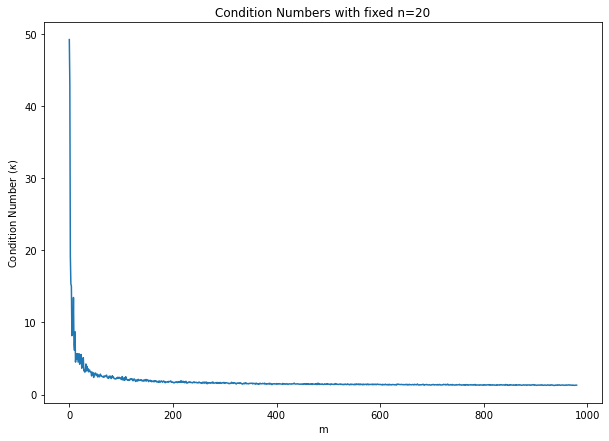

In [49]:
plt.figure(figsize=[10,7])
plt.plot(conds)
plt.title('Condition Numbers with fixed n=20')
plt.ylabel('Condition Number ($\kappa$)'); plt.xlabel('m');

In [50]:
conds = []
m=20
for n in np.arange(m,1000,1):
    conds.append(np.round(np.linalg.cond(np.random.randn(m,n)),2))

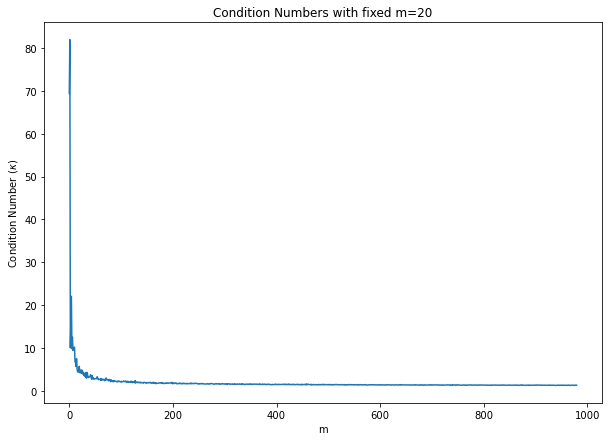

In [51]:
plt.figure(figsize=[10,7])
plt.plot(conds)
plt.title('Condition Numbers with fixed m=20')
plt.ylabel('Condition Number ($\kappa$)'); plt.xlabel('n');

In [ ]:
from mpl_toolkits import mplot3d

In [32]:
x = np.arange(1,100,1)
y = np.arange(1,100,1)
xx, yy = np.meshgrid(x, y)

@np.vectorize
def grid_cond(x,y):
    return np.linalg.cond(np.random.randn(x,y))

z = grid_cond(xx,yy)

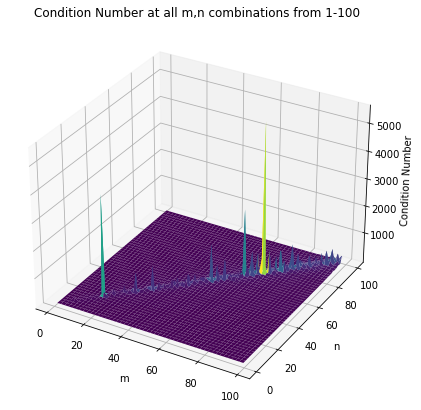

In [39]:
fig = plt.figure(figsize=[10,7])
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, z,cmap='viridis', edgecolor='none')
ax.set_title('Condition Number at all m,n combinations from 1-100');
ax.set_ylabel('n'); ax.set_xlabel('m'); ax.set_zlabel('Condition Number');
plt.show()

## Part (b)

To be able to compute the determinant, make m = n+1, so that when another column is added, the matrix becomes square.

In [529]:
m=21
n=20
A = np.random.randn(m,n)

A = np.concatenate((A,A[:,0].reshape(m,1)), axis=1)

print('condition number:',np.linalg.cond(A))

condition number: 4.389308233829384e+16


In [530]:
print('determinant:',np.linalg.det(A))

determinant: 4.1921278732269967e-08


## Part (c)

In [531]:
eps_space=np.logspace(-16,0,1000)
cond_B=[]
B = A.copy()
B[:,n] = B[:,0]
condBaseline = np.linalg.cond(B)
for eps in eps_space:
    B = A.copy()
    B[:,n] = B[:,0] + eps*np.random.randn(m)
    cond_B.append(np.linalg.cond(B))

In [532]:
eps_df = pd.DataFrame(cond_B, index=eps_space, columns=['k'])

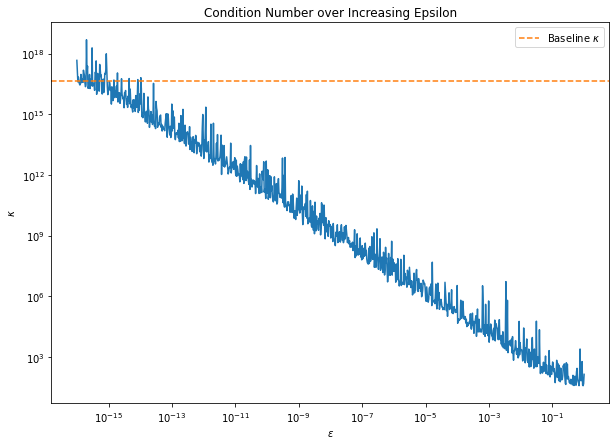

In [534]:
plt.figure(figsize=[10,7])
plt.plot(eps_df['k'])
plt.xscale('log')
plt.yscale('log')
plt.axhline(condBaseline, label='Baseline $\kappa$', c='C1', ls='--')
plt.xlabel('$\epsilon$'); plt.ylabel('$\kappa$'); plt.legend()
plt.title('Condition Number over Increasing Epsilon');

Condition number decreases very quickly then remains constantly low as larger noise is added to the (m+1)th column.  
See a non-log x axis here:

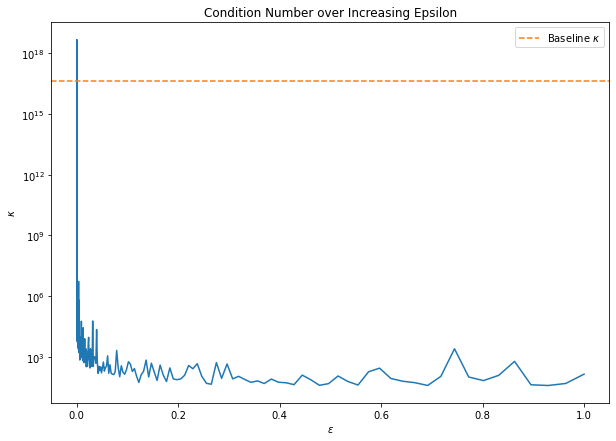

In [536]:
plt.figure(figsize=[10,7])
plt.plot(eps_df['k'])
#plt.xscale('log')
plt.yscale('log')
plt.axhline(condBaseline, label='Baseline $\kappa$', c='C1', ls='--')
plt.xlabel('$\epsilon$'); plt.ylabel('$\kappa$'); plt.legend()
plt.title('Condition Number over Increasing Epsilon');